<a href="https://colab.research.google.com/github/LeticiaKang/HappyVirus/blob/Leticia/%EA%B8%B0%EB%B3%B8_%EB%AA%A8%EB%8D%B8%EB%A1%9C_%EB%B9%84%EA%B5%90%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.models import Model
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from time import perf_counter, sleep

In [ ]:
# Data augmentation
def augmentation(target_size, batch_size, class_mode="categorical"):
  # print("start")
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    rotation_range=120, 
                                    horizontal_flip = True)

  test_datagen = ImageDataGenerator(rescale = 1./255)

  # Generate training and test sets
  train_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/테스트용/train',
                                                  target_size = (target_size,target_size),
                                                  batch_size = batch_size,
                                                  class_mode = 'categorical')

  test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/테스트용/test',
                                              target_size = (target_size,target_size),                                              # target_size = (299,299),
                                              batch_size = batch_size,
                                              class_mode = 'categorical')

  val_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/테스트용/val',
                                              target_size = (target_size,target_size),
                                              batch_size = batch_size,
                                              class_mode = 'categorical')
  # print("end")
  print("================================================================================================================")
  return train_set, test_set,val_set

def result_graph(history, model, test_set):
   # show the graph of train and validation loss/acc 
  import matplotlib.pyplot as plt
  fig, loss = plt.subplots()

  acc = loss.twinx()

  loss.plot(history.history['loss'], 'y', label='train loss')
  loss.plot(history.history['val_loss'], 'r', label='val loss')

  acc.plot(history.history['accuracy'], 'b', label='train acc')
  acc.plot(history.history['val_accuracy'], 'g', label='val acc')

  loss.set_xlabel('epoch')
  loss.set_ylabel('loss')
  acc.set_ylabel('accuray')

  loss.legend(loc='upper left')
  acc.legend(loc='lower left')

  plt.grid()
  plt.show()
  print("================================================================================================================")

  # Evaluate the model on the test set
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change
  print('loss:', round(result[0]))
  print('accuracy:', round(result[1], 5))

def base_model_run(base_model, epoch=20, optimizer="adam", class_num = 8,
                   pooling = GlobalAveragePooling2D(), dense_num = 1024,
                   train_set=train_set, validation_data=val_set, test_set=test_set):

  # # freezen the layers
  for layer in base_model.layers:
      layer.trainable = False
 

  # Add a GlobalAveragePooling layer
  x = base_model.output
  x = pooling(x)  # ★change
  x = Dense(dense_num, activation = 'relu')(x) # ★change
  # fix a number of classes
  predictions = Dense(class_num, activation='softmax')(x) # ★change

  # compile the model
  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(
    optimizer = optimizer, # ★change
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  # fit the model
  start = perf_counter()
  history = model.fit(train_set, epochs = epoch, validation_data = val_set) # ★change # ★change # ★change
  end = perf_counter()

  # print the learning time
  print(f"Time : {end-start}")

  result_graph(history, model, test_set)

  return history, model, test_set

def for_resnet_50

In [ ]:
def for_resnet_50(base_model, 
                  epoch = 50, optimizer = Adam(lr=1e-6), class_num = 8, pool_size = (7,7),
                  train_set=train_set, validation_data=val_set, test_set=test_set):

  # freezen the layers
  for layer in base_model.layers:
      layer.trainable = False

  # Add a GlobalAveragePooling layer
  x = base_model.output
  x = layers.AveragePooling2D(pool_size = pool_size)(x)  # ★change
  x = layers.Flatten()(x)
  x = layers.Dropout(0.5)(x)
  # fix a number of classes
  predictions = Dense(class_num, activation='softmax')(x) # ★change

  # compile the model
  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(
    optimizer = optimizer, # ★change
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  # fit the model
  start = perf_counter()
  history = model.fit(train_set, epochs = epoch, validation_data = val_set) # ★change # ★change # ★change
  end = perf_counter()

  # print the learning time
  print(f"Time : {end-start}")

  result_graph(history, model, test_set)

  return history, model, test_set

def for_efficientnet_V2_S

In [ ]:
def for_efficientnet_V2_S(base_model = base_model, epoch = 50, optimizer = Adam(lr=1e-6), class_num = 8, dense_num = 256):
  
  train_set, test_set,val_set = augmentation(target_size, batch_size, class_mode="categorical")

  # freezen the layers
  for layer in base_model.layers:
      layer.trainable = False

  # Add a GlobalAveragePooling layer
  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(dense_num, activation='relu')(x)   # ★change
  x = layers.Flatten()(x)
  predictions = Dense(class_num, activation='softmax')(x) # ★change

  # compile the model
  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(
    optimizer = optimizer, # ★change
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  # fit the model
  start = perf_counter()
  history = model.fit(train_set, epochs = epoch, validation_data = val_set) # ★change # ★change # ★change
  end = perf_counter()

  # print the learning time
  print(f"Time : {end-start}")

  result_graph(history, model, test_set)

## InceptionResnet_V2

Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Epoch 1/50
7/7 [==============================] - 27s 2s/step - loss: 3.0900 - accuracy: 0.2127 - val_loss: 1.7556 - val_accuracy: 0.3699
Epoch 2/50
7/7 [==============================] - 12s 2s/step - loss: 1.4273 - accuracy: 0.4887 - val_loss: 1.2016 - val_accuracy: 0.6301
Epoch 3/50
7/7 [==============================] - 12s 2s/step - loss: 1.2041 - accuracy: 0.5973 - val_loss: 1.1657 - val_accuracy: 0.5890
Epoch 4/50
7/7 [==============================] - 12s 2s/step - loss: 0.9245 - accuracy: 0.7104 - val_loss: 0.8510 - val_accuracy: 0.7260
Epoch 5/50
7/7 [==============================] - 12s 2s/step - loss: 0.7115 - accuracy: 0.7557 - val_loss: 0.8871 - val_accuracy: 0.7123
Epoch 6/50
7/7 [==============================] - 12s 2s/step - loss: 0.7204 - accuracy: 0.7330 - val_loss: 0.8656 - val_accuracy: 0.6986
Epoch 7/50
7/7 [==============================] - 1

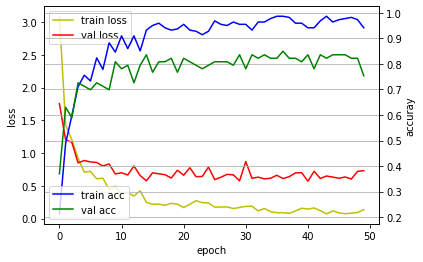

<ipython-input-52-01f9f0a20e61>:89: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change


loss: 0
accuracy: 0.86301


In [ ]:
train_set, test_set,val_set = augmentation(299, 32, class_mode="categorical")

input_tensor = tf.keras.layers.Input(shape=(299, 299, 3))

base_model = InceptionResNetV2(weights='imagenet', include_top=False,input_tensor=input_tensor)

base_model_run(base_model, epoch=50, optimizer="adam", class_num = 8,
                   pooling = GlobalAveragePooling2D(), dense_num = 1024,
                   train_set=train_set, validation_data=val_set, test_set=test_set)

## Resnet50

Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.


Epoch 1/50
4/4 [==============================] - 17s 4s/step - loss: 2.4618 - accuracy: 0.1357 - val_loss: 2.0738 - val_accuracy: 0.1096
Epoch 2/50
4/4 [==============================] - 11s 3s/step - loss: 2.3730 - accuracy: 0.1176 - val_loss: 2.0940 - val_accuracy: 0.1370
Epoch 3/50
4/4 [==============================] - 11s 3s/step - loss: 2.3858 - accuracy: 0.1222 - val_loss: 2.0915 - val_accuracy: 0.1781
Epoch 4/50
4/4 [==============================] - 11s 3s/step - loss: 2.3835 - accuracy: 0.1131 - val_loss: 2.0690 - val_accuracy: 0.2055
Epoch 5/50
4/4 [==============================] - 11s 3s/step - loss: 2.3149 - accuracy: 0.1493 - val_loss: 2.0640 - val_accuracy: 0.1781
Epoch 6/50
4/4 [==============================] - 11s 3s/step - loss: 2.2918 - accuracy: 0.1176 - val_loss: 2.0688 - val_accuracy: 0.1370
Epoch 7/50
4/4 [==============================] - 11s 3s/step - loss: 2.1699 - accuracy: 0.1448 - val_loss: 2.0604 - val_accuracy: 0.1507
Epoch 8/50
4/4 [==================

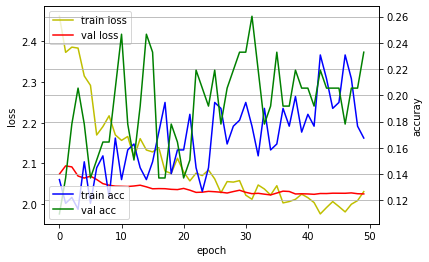

<ipython-input-54-229e9c2e83fe>:60: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change


loss: 2
accuracy: 0.20548


In [ ]:
train_set, test_set,val_set = augmentation(224, 64, class_mode="categorical")

input_tensor = tf.keras.layers.Input(shape=(224, 224, 3))

base_model = ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)

for_resnet_50(base_model, 
              epoch = 50, optimizer = Adam(lr=0.0001), class_num = 8, pool_size = (7,7),
              train_set=train_set, validation_data=val_set, test_set=test_set)


## EfficientNetV2S

Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Epoch 1/50
4/4 [==============================] - 27s 4s/step - loss: 8.7692 - accuracy: 0.1176 - val_loss: 10.2308 - val_accuracy: 0.1096
Epoch 2/50
4/4 [==============================] - 9s 2s/step - loss: 7.8345 - accuracy: 0.1448 - val_loss: 3.9720 - val_accuracy: 0.1918
Epoch 3/50
4/4 [==============================] - 9s 2s/step - loss: 3.8828 - accuracy: 0.0995 - val_loss: 3.9271 - val_accuracy: 0.1507
Epoch 4/50
4/4 [==============================] - 9s 2s/step - loss: 3.5579 - accuracy: 0.1267 - val_loss: 3.4019 - val_accuracy: 0.2192
Epoch 5/50
4/4 [==============================] - 9s 2s/step - loss: 2.9564 - accuracy: 0.1222 - val_loss: 2.6755 - val_accuracy: 0.1233
Epoch 6/50
4/4 [==============================] - 9s 2s/step - loss: 2.6590 - accuracy: 0.1855 - val_loss: 2.7477 - val_accuracy: 0.1233
Epoch 7/50
4/4 [==============================] - 9s 2s

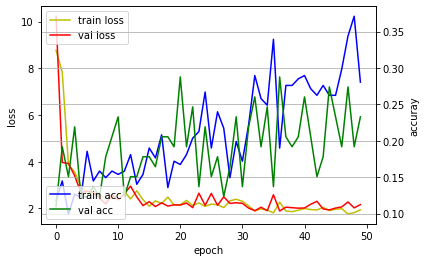

<ipython-input-59-e65b750c489a>:59: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change


loss: 2
accuracy: 0.28767


In [ ]:
# avgpooling 넣기 전

train_set, test_set,val_set = augmentation(target_size = 128, batch_size = 64, class_mode="categorical")

input_tensor = tf.keras.layers.Input(shape=(128, 128, 3))

base_model = EfficientNetV2S(weights='imagenet', include_top=False,input_tensor=input_tensor)

# rmsp = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.9)
for_efficientnet_V2_S(base_model, 
                      epoch = 50, optimizer = "RMSprop", class_num = 8, dense_num = 256,
                      train_set=train_set, validation_data=val_set, test_set=test_set)


Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Epoch 1/50
4/4 [==============================] - 27s 4s/step - loss: 2.1934 - accuracy: 0.1448 - val_loss: 2.0428 - val_accuracy: 0.1781
Epoch 2/50
4/4 [==============================] - 9s 3s/step - loss: 2.0801 - accuracy: 0.1900 - val_loss: 1.9710 - val_accuracy: 0.2740
Epoch 3/50
4/4 [==============================] - 9s 2s/step - loss: 2.0047 - accuracy: 0.2081 - val_loss: 2.0542 - val_accuracy: 0.1644
Epoch 4/50
4/4 [==============================] - 9s 2s/step - loss: 2.0584 - accuracy: 0.1765 - val_loss: 1.9632 - val_accuracy: 0.1781
Epoch 5/50
4/4 [==============================] - 9s 2s/step - loss: 1.9836 - accuracy: 0.2262 - val_loss: 1.9771 - val_accuracy: 0.2055
Epoch 6/50
4/4 [==============================] - 9s 2s/step - loss: 1.9430 - accuracy: 0.2624 - val_loss: 2.0009 - val_accuracy: 0.1507
Epoch 7/50
4/4 [==============================] - 9s 3s/

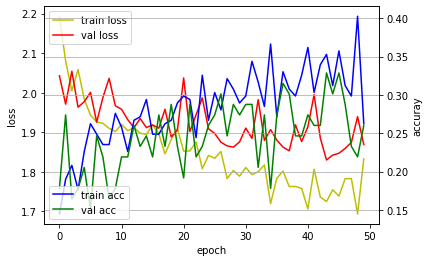

<ipython-input-65-4a0fa1f0f65e>:60: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change


loss: 2
accuracy: 0.21918


In [ ]:
# avg pooling 넣은 후

train_set, test_set,val_set = augmentation(target_size = 128, batch_size = 64, class_mode="categorical")

input_tensor = tf.keras.layers.Input(shape=(128, 128, 3))

base_model = EfficientNetV2S(weights='imagenet', include_top=False,input_tensor=input_tensor)

def top_layer():
  # Add a GlobalAveragePooling layer
  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(dense_num, activation='relu')(x)   # ★change
  x = layers.Flatten()(x)
  predictions = Dense(class_num, activation='softmax')(x) # ★change


# rmsp = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.9)
def for_efficientnet_V2_S(base_model = base_model, top_layer = top_layer(), epoch = 50, optimizer =  "RMSprop", class_num = 8, dense_num = 256):


---

In [ ]:
def for_efficientnet_V2_S(base_model = base_model, epoch = 50, optimizer = Adam(lr=0.001), class_num = 8, dense_num = 256, target_size = 128, batch_size = 32):
  
  train_set, test_set,val_set = augmentation(target_size, batch_size, class_mode="categorical")

  # freezen the layers
  for layer in base_model.layers:
      layer.trainable = False

  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  predictions = Dense(8, activation='softmax')(x)
  
  # compile the model
  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(
    optimizer = optimizer, # ★change
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  # fit the model
  start = perf_counter()
  history = model.fit(train_set, epochs = epoch, validation_data = val_set) # ★change # ★change # ★change
  end = perf_counter()

  # print the learning time
  print(f"Time : {end-start}")

  result_graph(history, model, test_set)

  return history, model, test_set

Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Epoch 1/50
74/74 [==============================] - 26s 185ms/step - loss: 2.1125 - accuracy: 0.1357 - val_loss: 2.0000 - val_accuracy: 0.1918
Epoch 2/50
74/74 [==============================] - 9s 127ms/step - loss: 2.0313 - accuracy: 0.1900 - val_loss: 1.9763 - val_accuracy: 0.2055
Epoch 3/50
74/74 [==============================] - 9s 128ms/step - loss: 2.0064 - accuracy: 0.2036 - val_loss: 1.9814 - val_accuracy: 0.2192
Epoch 4/50
74/74 [==============================] - 10s 128ms/step - loss: 1.9709 - accuracy: 0.2262 - val_loss: 1.9465 - val_accuracy: 0.2740
Epoch 5/50
74/74 [==============================] - 9s 127ms/step - loss: 1.9753 - accuracy: 0.2489 - val_loss: 1.9710 - val_accuracy: 0.2192
Epoch 6/50
74/74 [==============================] - 10s 129ms/step - loss: 1.9969 - accuracy: 0.2081 - val_loss: 1.9876 - val_accuracy: 0.3014
Epoch 7/50
74/74 [======

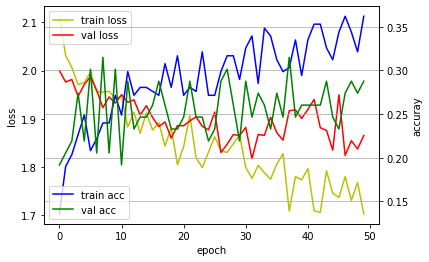

<ipython-input-87-1dcd4f05ad10>:56: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change


loss: 2
accuracy: 0.19178


(<keras.callbacks.History at 0x7f3358595700>,
 <keras.engine.functional.Functional at 0x7f32b4f60670>)

In [ ]:
input_tensor = tf.keras.layers.Input(shape=(128, 128, 3))
base_model = EfficientNetV2S(weights='imagenet', include_top=False,input_tensor=input_tensor)

# rmsp = /tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.9)
history, model, test_set = for_efficientnet_V2_S(base_model = base_model, epoch = 50, optimizer = "RMSprop", class_num = 8, dense_num = 256, target_size = 128, batch_size = 32)

---

In [ ]:
def for_efficientnet_V2_S(base_model = base_model, epoch = 50, optimizer = Adam(lr=0.001), class_num = 8 target_size = 128, batch_size = 32):
  
  train_set, test_set,val_set = augmentation(target_size, batch_size, class_mode="categorical")

  # freezen the layers
  for layer in base_model.layers:
      layer.trainable = False

  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(512, activation='relu')(x)
  predictions = Dense(8, activation='softmax')(x)
  
  # compile the model
  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(
    optimizer = optimizer, # ★change
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  # fit the model
  start = perf_counter()
  history = model.fit(train_set, epochs = epoch, validation_data = val_set) # ★change # ★change # ★change
  end = perf_counter()

  # print the learning time
  print(f"Time : {end-start}")

  result_graph(history, model, test_set)

  return history, model, test_set

Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Epoch 1/50
4/4 [==============================] - 26s 4s/step - loss: 2.1502 - accuracy: 0.1448 - val_loss: 2.0326 - val_accuracy: 0.1644
Epoch 2/50
4/4 [==============================] - 9s 2s/step - loss: 2.0848 - accuracy: 0.1946 - val_loss: 2.0037 - val_accuracy: 0.2466
Epoch 3/50
4/4 [==============================] - 9s 2s/step - loss: 2.0233 - accuracy: 0.1719 - val_loss: 2.0187 - val_accuracy: 0.2055
Epoch 4/50
4/4 [==============================] - 9s 2s/step - loss: 2.0192 - accuracy: 0.2127 - val_loss: 2.0032 - val_accuracy: 0.1918
Epoch 5/50
4/4 [==============================] - 9s 2s/step - loss: 2.0197 - accuracy: 0.1900 - val_loss: 2.0231 - val_accuracy: 0.1507
Epoch 6/50
4/4 [==============================] - 9s 2s/step - loss: 1.9840 - accuracy: 0.2353 - val_loss: 1.9927 - val_accuracy: 0.2055
Epoch 7/50
4/4 [==============================] - 9s 2s/

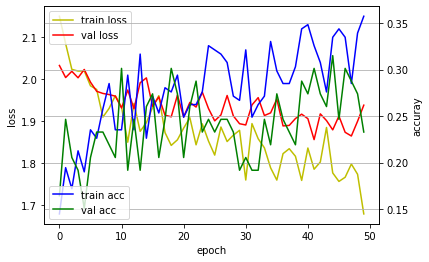

<ipython-input-87-1dcd4f05ad10>:56: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change


loss: 2
accuracy: 0.12329


In [ ]:
input_tensor = tf.keras.layers.Input(shape=(128, 128, 3))
base_model = EfficientNetV2S(weights='imagenet', include_top=False,input_tensor=input_tensor)

# rmsp = tf.keras.optimizers.RMSprop(lr=0.001)
history, model, test_set = for_efficientnet_V2_S(base_model = base_model, epoch = 50, optimizer = "adam", class_num = 8, target_size = 128, batch_size = 64)

In [ ]:
def for_efficientnet_V2_S(base_model = base_model, epoch = 50, optimizer = Adam(lr=0.001), class_num = 8, dense_num = 256, target_size = 128, batch_size = 32):
  
  train_set, test_set,val_set = augmentation(target_size, batch_size, class_mode="categorical")

  # freezen the layers
  for layer in base_model.layers:
      layer.trainable = False

  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  predictions = Dense(8, activation='softmax')(x)
  
  # compile the model
  model = Model(inputs=base_model.input, outputs=predictions)
  model.compile(
    optimizer = optimizer, # ★change
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  # fit the model
  start = perf_counter()
  history = model.fit(train_set, epochs = epoch, validation_data = val_set) # ★change # ★change # ★change
  end = perf_counter()

  # print the learning time
  print(f"Time : {end-start}")

  result_graph(history, model, test_set)

  return history, model, test_set

Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Epoch 1/50
7/7 [==============================] - 27s 2s/step - loss: 2.0766 - accuracy: 0.1674 - val_loss: 2.0497 - val_accuracy: 0.2192
Epoch 2/50
7/7 [==============================] - 10s 2s/step - loss: 2.0411 - accuracy: 0.1719 - val_loss: 2.0353 - val_accuracy: 0.2055
Epoch 3/50
7/7 [==============================] - 11s 2s/step - loss: 2.0352 - accuracy: 0.1946 - val_loss: 2.0307 - val_accuracy: 0.1781
Epoch 4/50
7/7 [==============================] - 11s 2s/step - loss: 2.0227 - accuracy: 0.2217 - val_loss: 2.0292 - val_accuracy: 0.2192
Epoch 5/50
7/7 [==============================] - 10s 2s/step - loss: 2.0007 - accuracy: 0.2353 - val_loss: 2.0252 - val_accuracy: 0.2192
Epoch 6/50
7/7 [==============================] - 10s 1s/step - loss: 2.0064 - accuracy: 0.2036 - val_loss: 2.0226 - val_accuracy: 0.2466
Epoch 7/50
7/7 [==============================] - 1

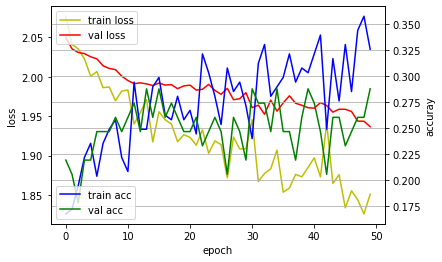

<ipython-input-98-bef50f677d59>:56: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result= model.evaluate_generator(test_set) #test_loss, test_acc # ★change


loss: 2
accuracy: 0.23288


In [ ]:
input_tensor = tf.keras.layers.Input(shape=(224, 224, 3))
base_model = EfficientNetV2S(weights='imagenet', include_top=False,input_tensor=input_tensor)

# rmsp = tf.keras.optimizers.RMSprop(lr=0.001)
history, model, test_set = for_efficientnet_V2_S(base_model = base_model, epoch = 50, optimizer = "RMSprop", class_num = 8, target_size = 224, batch_size = 32)